# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    
    def predict(self, X):
        return (np.dot(self.add_bias(X), self.weights) >= 0) * 1
    
    def fit(self, X, y, itr=1000, lr=0.0001):
        X = self.add_bias(X)
        self.weights = np.zeros(X.shape[1])
        for _ in range(itr): 
            self.weights += lr * np.dot((y - self.predict(X[:,1:])), X)
            
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)

In [7]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

In [8]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
X, y = load_digits(return_X_y=True)
clf = Perceptron()
clf.fit(X, (y==9)*1)
pre = clf.predict(X)
accuracy_score((y==9)*1, pre) # Predicting 9 


0.9905397885364496

In [9]:
# This will handle any type of binary target int or categorical
class Perceptron2:

    def predict(self, X):
        X = self.add_bias(X)
        convert_to_class = lambda c: self.classes[1] if c >= 0 else self.classes[0]
        return np.vectorize(convert_to_class)(X.dot(self.weights))
    
    def fit(self, X, y, epochs=1000, lr=0.001):
        self.classes = np.unique(y)
        X = self.add_bias(X)
        y = (y == self.classes[1]) * 1
        self.weights = np.zeros(X.shape[1])
        for _ in range(epochs): 
            self.weights += lr * np.dot((y - self.predict(X[:,1:])), X)
            
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)

In [10]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
X, y = load_digits(return_X_y=True)
clf = Perceptron2()
clf.fit(X, (y==9)*1)
pre = clf.predict(X)
accuracy_score((y==9)*1, pre) # Predicting 9 


0.9922092376182526

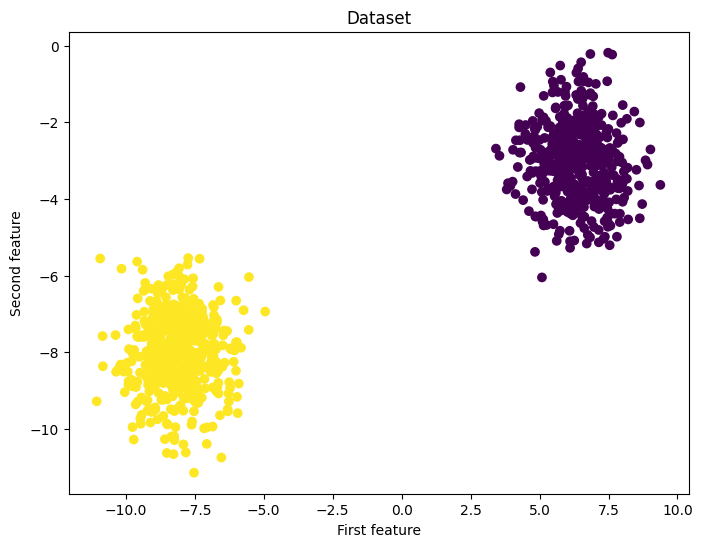

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=1000, centers=2)  # type: ignore
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)  # type: ignore
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
p = Perceptron()
p.fit(X_train, y_train)
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)
print("training accuracy: {} %".format(100 - np.mean(np.abs(y_p_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_p_test - y_test)) * 100))

training accuracy: 100.0 %
test accuracy: 100.0 %


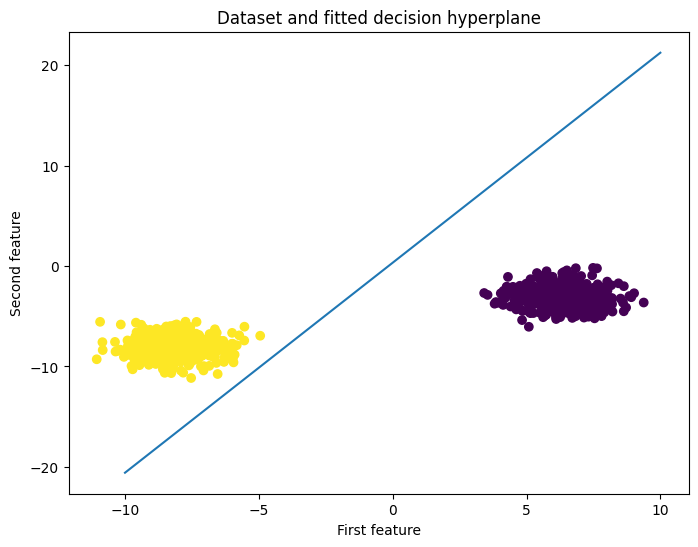

In [19]:
plot_hyperplane(X, y, p.weights[1:], p.weights[0])

# Đọc dữ liệu

# Điều tra dữ liệu

# Xoá các cột không cần thiết

# Xử lý dữ liệu còn thiếu

# Tạo tập dữ liệu và kiểm tra

# Train và thử model

# Tuỳ chọn, vẽ kết quả